In [1]:
!pip install -qqq roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 133.0 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
#provide api key
rf = Roboflow(api_key="")
project = rf.workspace("roboflow-universe-projects").project("fall-detection-ca3o8")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fall-Detection-4 in yolov8:: 100%|██████████| 21586/21586 [00:02<00:00, 7437.98it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import torch
if torch.cuda.is_available():
  print(f"GPU Name: {torch.cuda.get_device_name(0)}")

GPU Name: Tesla T4


In [4]:
!pip uninstall -y wandb

Found existing installation: wandb 0.22.2
Uninstalling wandb-0.22.2:
  Successfully uninstalled wandb-0.22.2


In [5]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/fall_yolov8n_best.pt')

In [6]:
print(model.names)

{0: 'Fall-Detected'}


In [7]:
model.train(
    data=dataset.location + '/data.yaml',
    epochs=25,
    imgsz=640,
    batch=16,
    name='fall_yolov8n_roboflow',
    device=0,
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Fall-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/fall_yolov8n_best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fall_yolov8n_roboflow, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780b8c76d820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
metrics = model.val()
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1252.6±612.2 MB/s, size: 61.5 KB)
val: Scanning /content/Fall-Detection-4/valid/labels.cache... 899 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 899/899 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 57/57 6.1it/s 9.3s
                   all        899        899      0.825      0.828      0.882      0.538
Speed: 1.4ms preprocess, 3.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val
mAP50: 0.8816
mAP50-95: 0.5377


In [9]:
from pathlib import Path
import shutil

# Source: your best model
src = Path("/content/runs/detect/fall_yolov8n_roboflow/weights/35epochs_best.pt")

# Destination: Google Drive folder (create if needed)
dst_folder = Path("/content/drive/MyDrive/fall_detection_models")
dst_folder.mkdir(parents=True, exist_ok=True)
dst = dst_folder / "fall_yolov8n_35epochs.pt"

# Copy
shutil.copy(src, dst)
print(f"Model saved to Google Drive: {dst}")

Model saved to Google Drive: /content/drive/MyDrive/fall_detection_models/fall_yolov8n_35epochs.pt


In [10]:
# Create a YAML file that uses the TEST split
test_yaml_content = f"""
path: {dataset.location}
train: train/images
val: test/images   # ← Corrected path to test images

nc: 1
names: ['fall'] # Corrected number of classes and names
"""

with open('test.yaml', 'w') as f:
    f.write(test_yaml_content)

print("Created test.yaml for test-set evaluation")

Created test.yaml for test-set evaluation


In [12]:
from ultralytics import YOLO

# Load your best model
model = YOLO('/content/drive/MyDrive/fall_detection_models/fall_yolov8n_35epochs.pt')

# Evaluate on TEST set
test_metrics = model.val(
    data='test.yaml',
    plots=True,          # saves confusion matrix, PR curves, etc.
    save_json=True,      # optional: saves detailed results
    device=0
)

# Print test metrics
print("\n=== TEST SET RESULTS ===")
print(f"mAP50:     {test_metrics.box.map50:.4f}")
print(f"mAP50-95:  {test_metrics.box.map:.4f}")
print(f"Precision: {test_metrics.box.mp:.4f} (mean)")
print(f"Recall:    {test_metrics.box.mr:.4f} (mean)")

# Per-class (only for 'fall' as it's the only class)
cls = 'fall'
p = test_metrics.box.p[0]
r = test_metrics.box.r[0]
f1 = 2 * (p * r) / (p + r + 1e-8)
print(f"Class '{cls}' → P: {p:.4f}, R: {r:.4f}, F1: {f1:.4f}")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1330.3±428.3 MB/s, size: 59.8 KB)
val: Scanning /content/Fall-Detection-4/test/labels... 450 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 450/450 2.5Kit/s 0.2s
val: New cache created: /content/Fall-Detection-4/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 29/29 3.8it/s 7.5s
                   all        450        450      0.849      0.775      0.853      0.513
Speed: 2.7ms preprocess, 4.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Saving /content/runs/detect/val2/predictions.json...
Results saved to /content/runs/detect/val2

=== TEST SET RESULTS ===
mAP50:     0.8525
mAP50-95:  0.5132
Precision: 0.8490 (mean)
Recall:    0.7748 (mean)
Class 'fall' → P: 0.8490, R: 0.7748, F1: 0.810

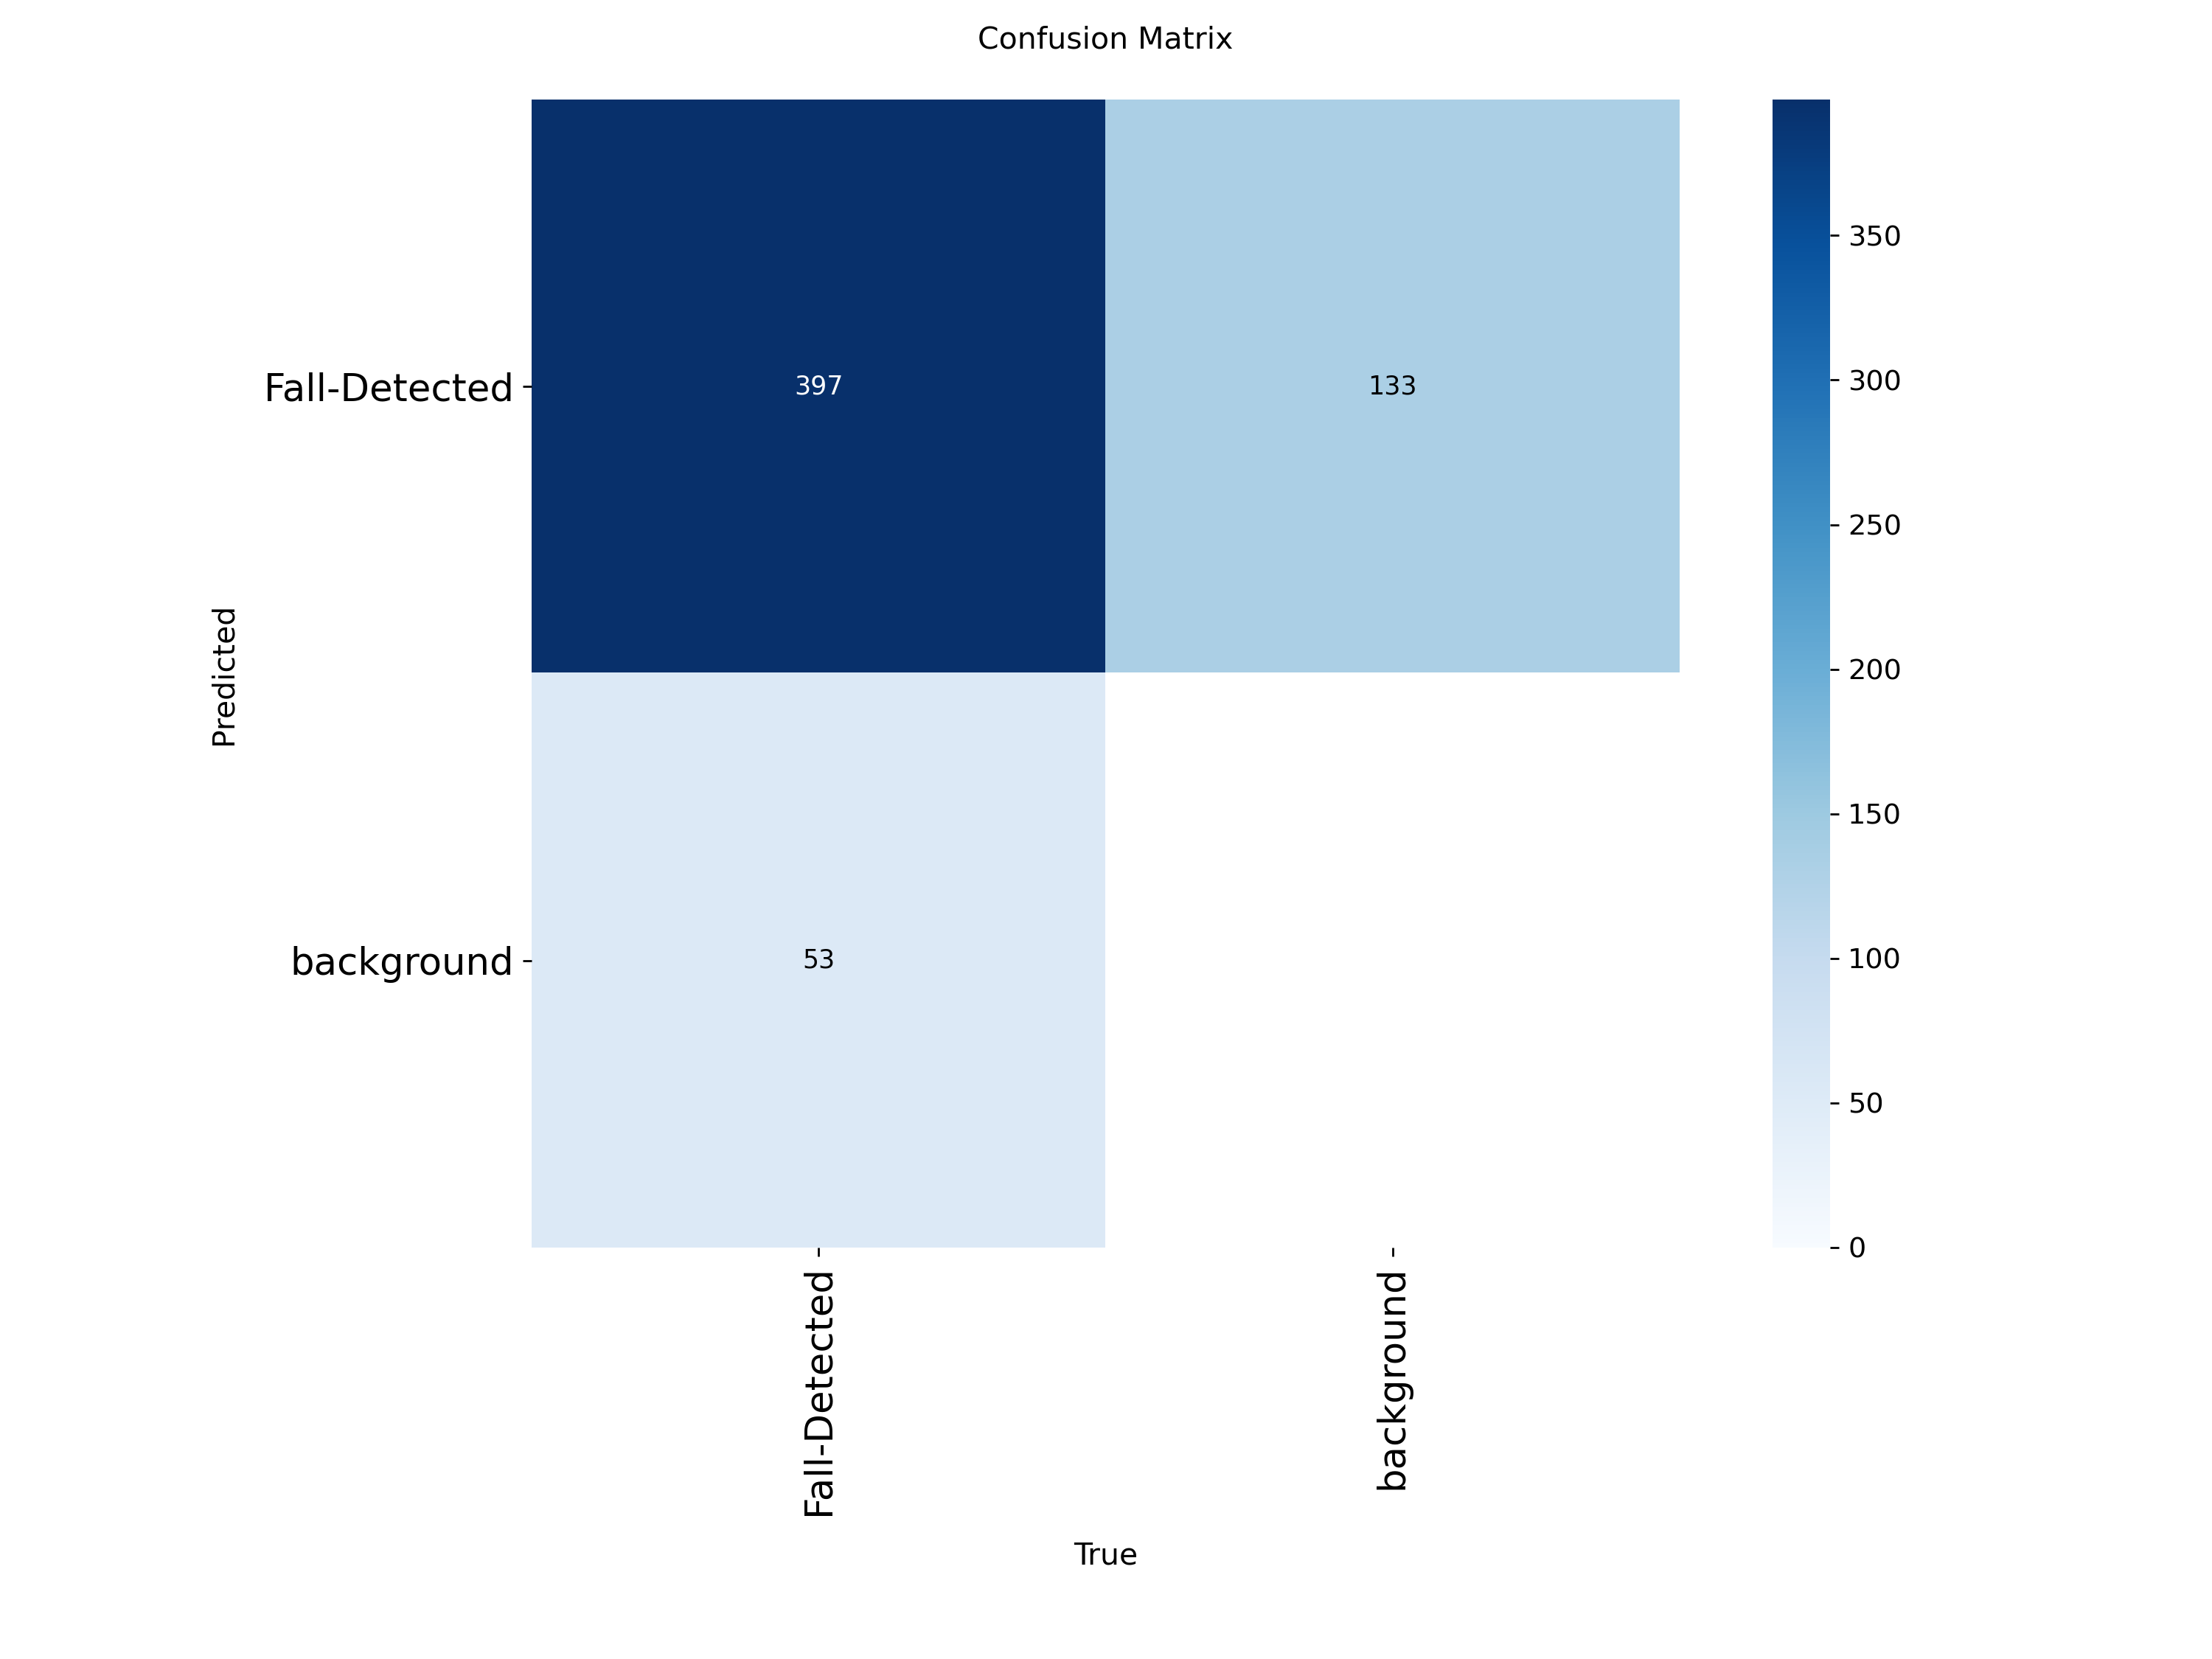

In [13]:
from IPython.display import Image, display

# Display the confusion matrix image saved by Ultralytics
display(Image(filename="/content/runs/detect/val2/confusion_matrix.png"))